In [1]:
import numpy as np
import matplotlib.pyplot as plt
import legwork as lw
import astropy.units as u
import tqdm
from astropy.cosmology import Planck18, z_at_value
from scipy.integrate import trapz
from schwimmbad import MultiPool

In [12]:
e_grid = np.array([0.001, 0.003, 0.007, 0.01, 0.03, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85])
mass_grid = np.logspace(np.log10(5), np.log10(80), 15)
q_grid = np.linspace(0.1, 1, 15)
f_grid = np.logspace(-4, -1.0, 100)

In [13]:
M1, Q, E, F = np.meshgrid(mass_grid, q_grid, e_grid, f_grid)

In [14]:
MC = lw.utils.chirp_mass(M1 * u.Msun, M1 * Q * u.Msun)
M2 = M1 * Q   

In [15]:
np.shape(F[:,:,:,:]), len(F.flatten())

((15, 15, 15, 100), 337500)

In [16]:
source = lw.source.Source(m_1=M1.flatten() * u.Msun,
                          m_2=M2.flatten() * u.Msun,
                          ecc=E.flatten(),
                          f_orb=F.flatten()*u.Hz,
                          dist=8 * np.ones(len(E.flatten())) * u.Mpc,
                          interpolate_g=True)
                                  
snr = source.get_snr(approximate_R=True, verbose=False)

In [17]:
snr_thresh = 12.0
D_horizon = snr / snr_thresh * 8 * u.Mpc
D_horizon = np.reshape(D_horizon, M1.shape)

In [18]:
dat_all = np.array([M1, M2, E, F, D_horizon.value])
np.save('horizon_dat', dat_all, allow_pickle=True)

In [24]:
D_horizon

array([[[[7.18025429e-05, 8.99242714e-05, 1.12127447e-04, ...,
          4.07235258e-01, 3.58005984e-01, 3.14256837e-01],
         [7.18025429e-05, 8.99242714e-05, 1.12127447e-04, ...,
          4.07235258e-01, 3.58005984e-01, 3.14256837e-01],
         [7.18025429e-05, 8.99242714e-05, 1.12127447e-04, ...,
          4.07235258e-01, 3.58005984e-01, 3.14256837e-01],
         ...,
         [3.35639183e-03, 4.17348559e-03, 5.16603058e-03, ...,
          5.07157219e-02, 3.40701143e-02, 0.00000000e+00],
         [1.36471888e-02, 1.59897964e-02, 1.86115819e-02, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [2.63061414e-02, 2.96561287e-02, 3.32594156e-02, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[9.98820488e-05, 1.25090562e-04, 1.55976636e-04, ...,
          4.68259854e-01, 4.12065527e-01, 3.62106139e-01],
         [9.98820488e-05, 1.25090562e-04, 1.55976636e-04, ...,
          4.68259854e-01, 4.12065527e-01, 3.62106139e-01],
        

In [20]:
M1, M2, E, F, D_horizon = dat_all

0.001


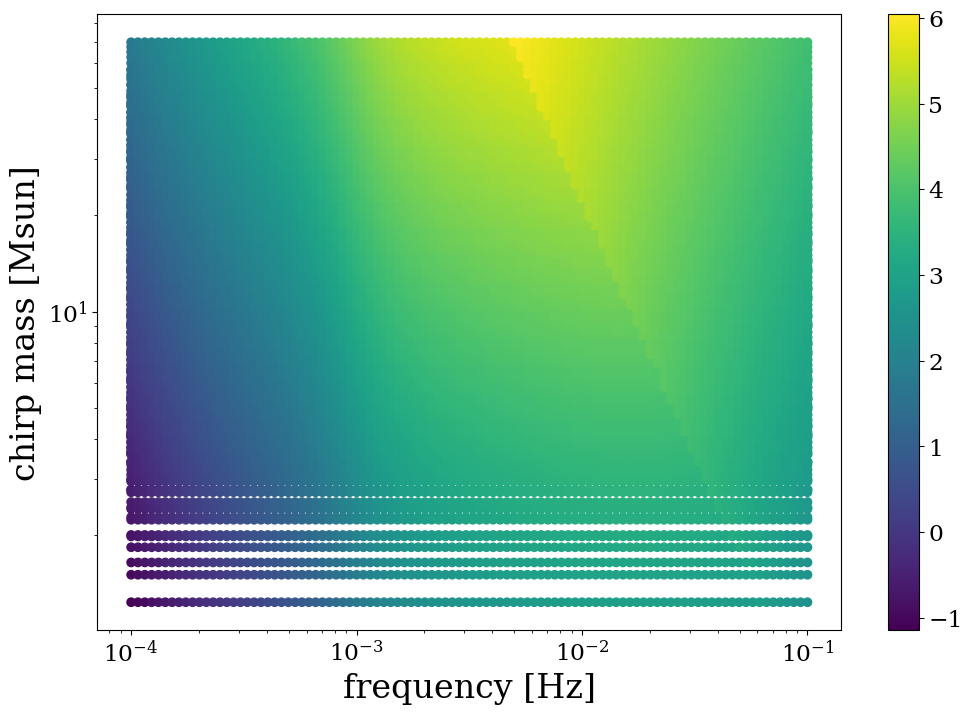

0.0021016749801592996


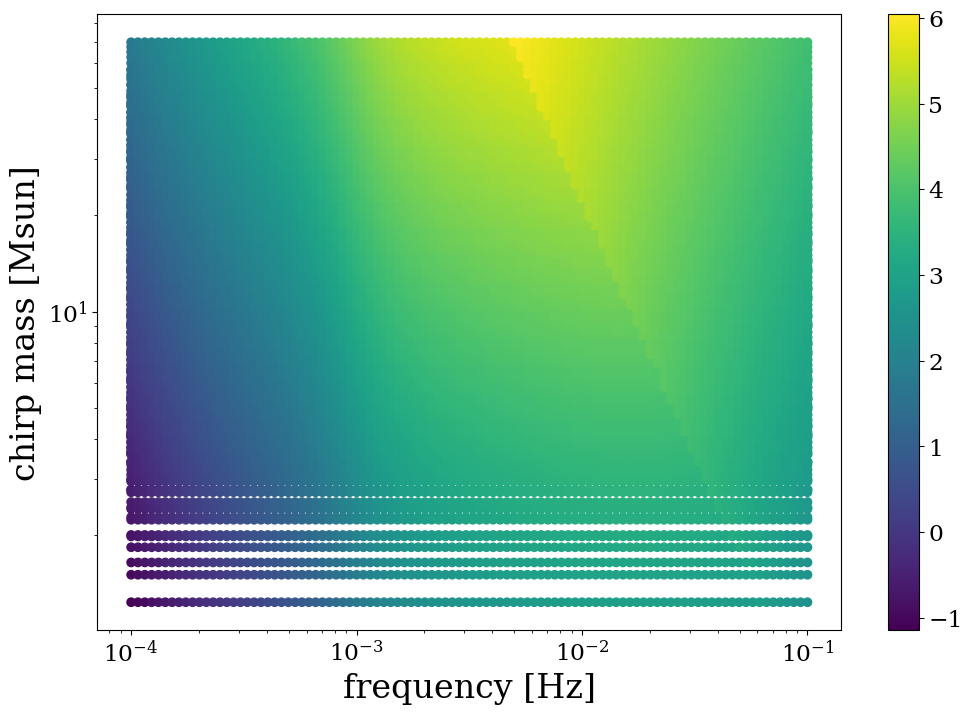

0.004417037722227593


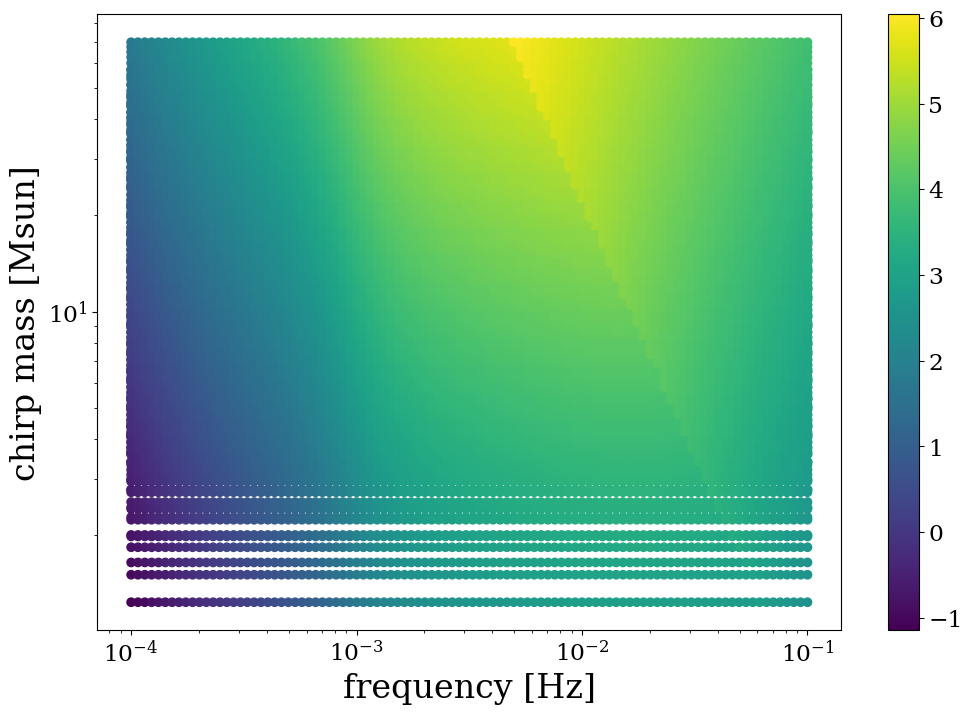

0.009283177667225565


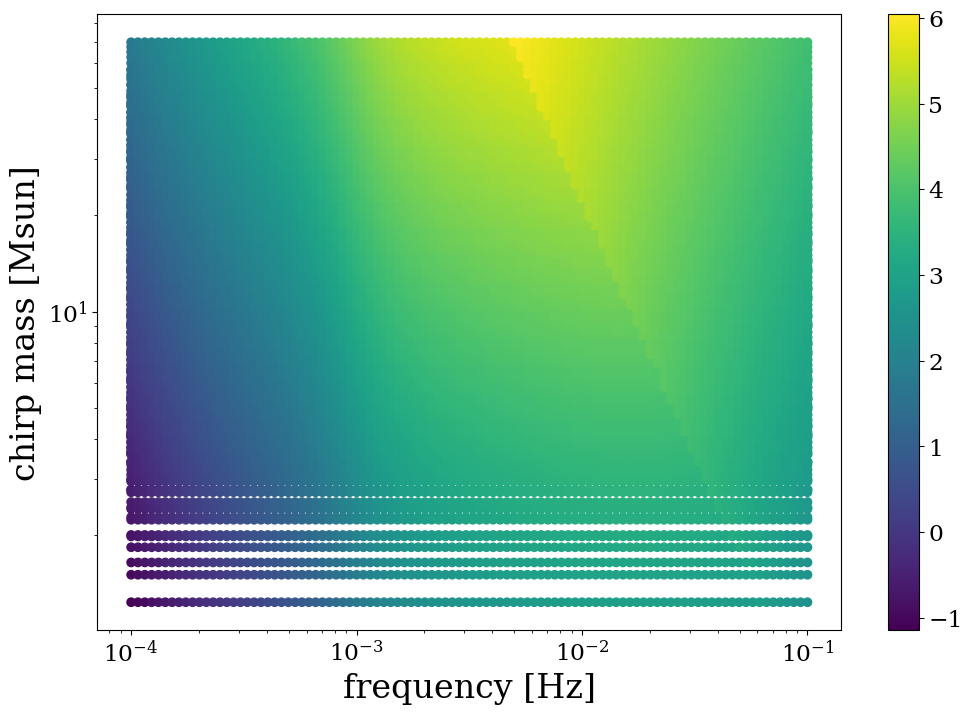

0.019510222239581536


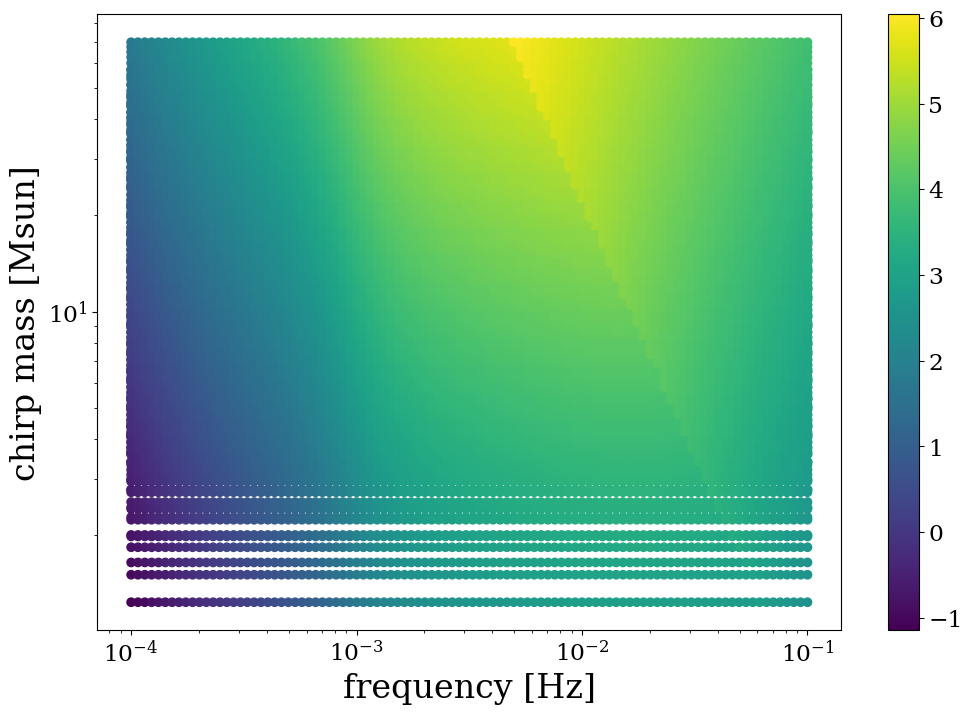

0.04100414593827605


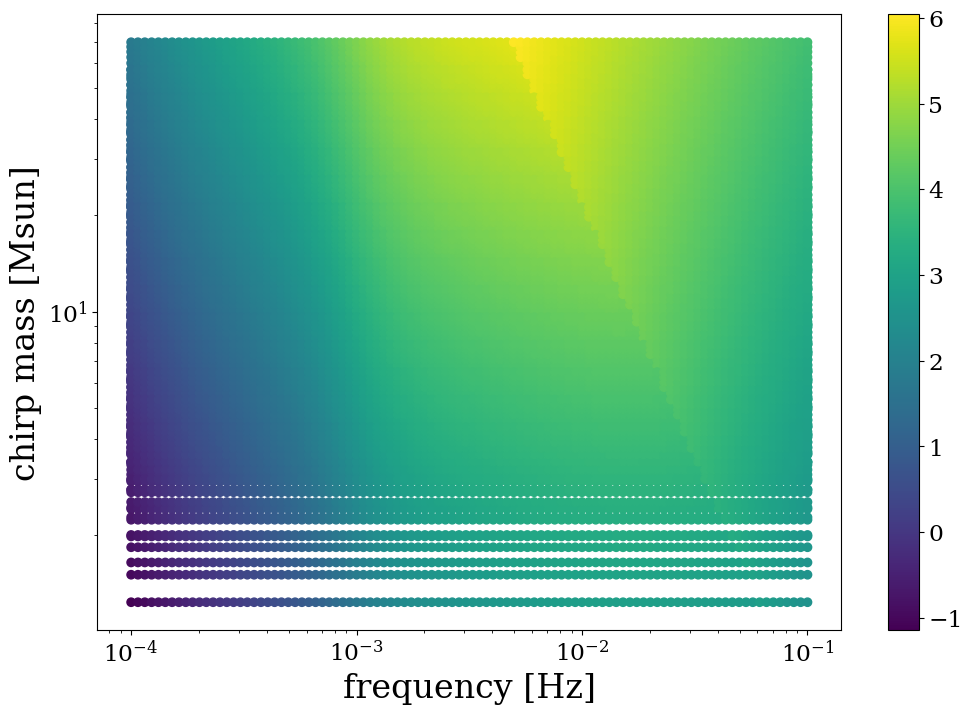

0.0861773876012754


/var/folders/w7/h_b_mvnd5s53msxqvpnrsrw80000gn/T/ipykernel_18909/4115529217.py:4: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(F[:,:,ii,:], chirp_mass, c=np.log10(D_horizon[:,:,ii,:].to(u.kpc).value))


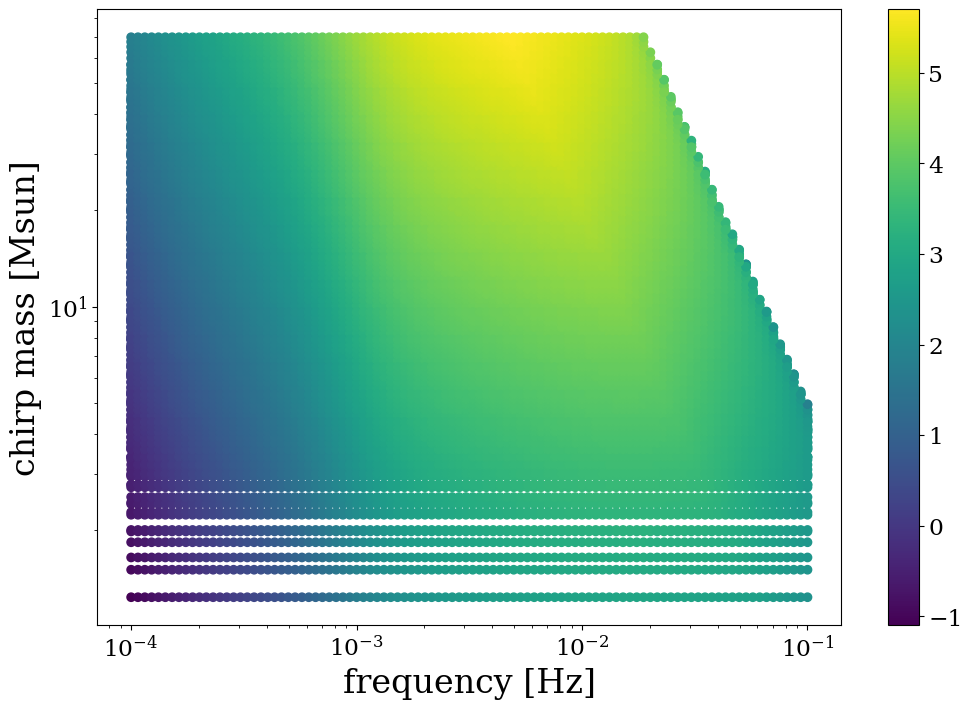

0.18111685937709077


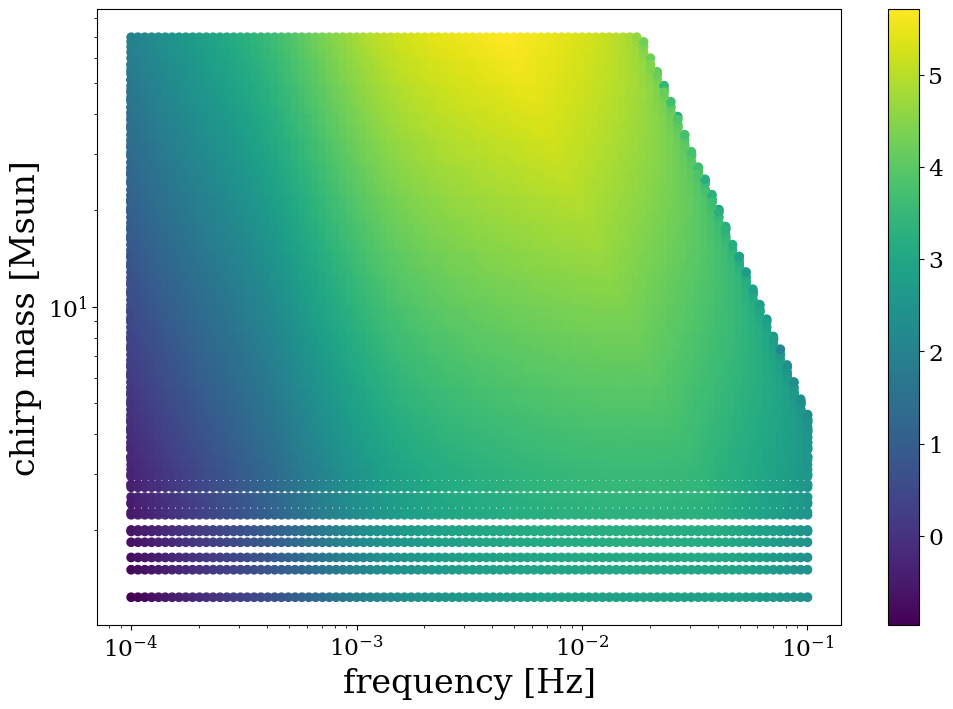

0.38064877183786194


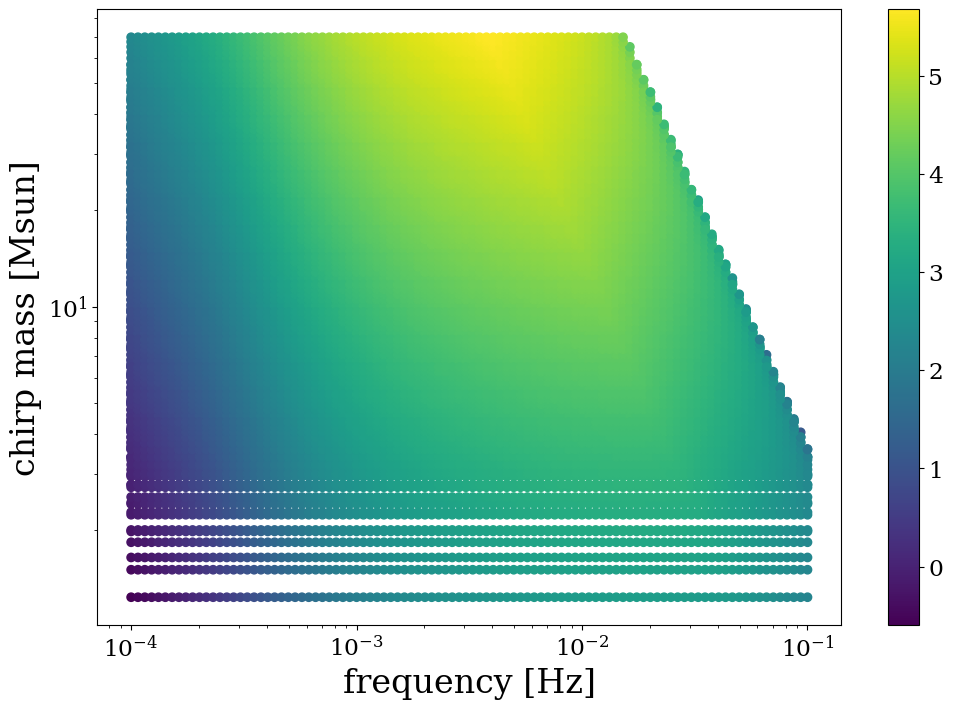

0.8


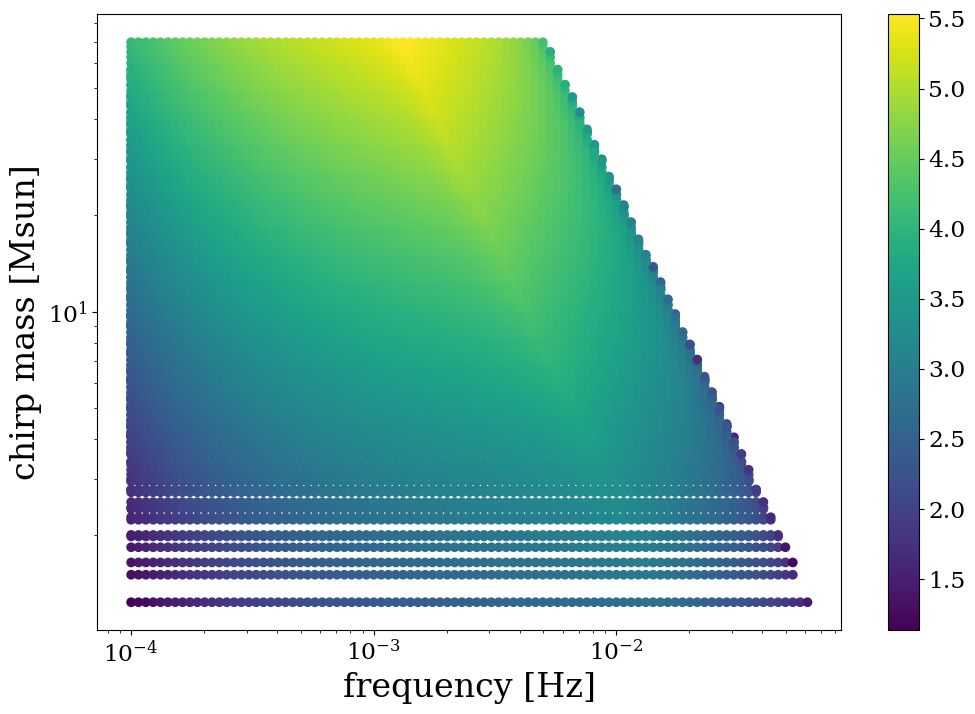

In [11]:
for ii in range(len(e_grid)):
    print(e_grid[ii])
    chirp_mass = lw.utils.chirp_mass(M1[:,:,ii,:] * u.Msun, M1[:,:,ii,:] * Q[:,:,ii,:] * u.Msun)
    plt.scatter(F[:,:,ii,:], chirp_mass, c=np.log10(D_horizon[:,:,ii,:].to(u.kpc).value))
    plt.colorbar()
    plt.xscale('log')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('chirp mass [Msun]')
    plt.yscale('log')
    plt.show()

### Let's try a multivariate interpolation with nearest neighbors

In [ ]:
from scipy.interpolate import NearestNDInterpolator

In [ ]:
interp = NearestNDInterpolator(list(zip(MC.value.flatten(), F.flatten(), E.flatten())), D_horizon.value.flatten())

In [ ]:
e_grid_test = np.logspace(-3, np.log10(1-0.12), 20)
mass_grid_test = np.logspace(np.log10(5), np.log10(80), 20)
q_grid_test = np.logspace(-1, 0, 30)
f_grid_test = np.logspace(-4, -1.5, 500)

In [ ]:
M1_T, Q_T, E_T, F_T = np.meshgrid(mass_grid_test, q_grid_test, e_grid_test, f_grid_test)

In [ ]:
len(E_T.flatten())

In [ ]:
MC_T = lw.utils.chirp_mass(M1_T * u.Msun, M1_T * Q_T * u.Msun)


In [ ]:
D_H_T = interp(MC_T, F_T, E_T)

In [ ]:
for ii in range(len(e_grid_test)):
    print(e_grid_test[ii])
    plt.scatter(F_T[:,:,ii,:], MC_T[:,:,ii,:], c=np.log10((D_H_T[:,:,ii,:] * u.Mpc).to(u.kpc).value))
    plt.colorbar()
    plt.xscale('log')
    plt.xlabel('frequency [Hz]')
    plt.ylabel('chirp mass [Msun]')
    plt.yscale('log')
    plt.show()

In [ ]:
e_grid_test[::2]